In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
pd.set_option('display.max_colwidth', None)
tweet_data = pd.read_csv('/home/karen/Documents/Datasets/training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1")
tweet_data

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


In [3]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [4]:
tweet_data.isnull().sum()

0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

In [5]:
column_names=["target","id","date" , "query", "username", "text"]
tweet_data.columns = column_names
tweet_data

,target,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


In [6]:
text_df = tweet_data.drop(['target', 'id', 'date', 'query', 'username'] ,axis=1)
text_df

,text
0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,@Kwesidei not the whole crew
...,...
1599994,Just woke up. Having no school is the best feeling ever
1599995,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,Are you ready for your MoJo Makeover? Ask me for details
1599997,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


In [7]:
tweet_data.text[0]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [8]:
from nltk import word_tokenize
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def data_processing(text):
    text=text.lower()
    text=re.sub(r"https\S+|www\S+https\S+",' ',text, flags=re.MULTILINE) 
    text=re.sub(r'\@w+|\#',' ',text)
    text=re.sub(r'[^\w\s]' ,' ',text)
    text_tokens = word_tokenize(text)
    filtered_text =[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

text_df.text = text_df['text'].apply(data_processing)

In [9]:
#check and drop duplicate data
text_df = text_df.drop_duplicates('text')
text_df

,text
0,upset update facebook texting might cry result school today also blah
1,kenichan dived many times ball managed save 50 rest go bounds
2,whole body feels itchy like fire
3,nationwideclass behaving mad see
4,kwesidei whole crew
...,...
1599994,woke school best feeling ever
1599995,thewdb com cool hear old walt interviews â http blip fm 8bmta
1599996,ready mojo makeover ask details
1599997,happy 38th birthday boo alll time tupac amaru shakur


In [10]:
# to perform stemming -Stemming is a technique used to reduce an inflected word down to its word stem
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data 

In [11]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))
text_df

/tmp/ipykernel_3196/4199290745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].apply(lambda x: stemming(x))


,text
0,upset update facebook texting might cry result school today also blah
1,kenichan dived many times ball managed save 50 rest go bounds
2,whole body feels itchy like fire
3,nationwideclass behaving mad see
4,kwesidei whole crew
...,...
1599994,woke school best feeling ever
1599995,thewdb com cool hear old walt interviews â http blip fm 8bmta
1599996,ready mojo makeover ask details
1599997,happy 38th birthday boo alll time tupac amaru shakur


In [12]:
#calculate the polarity of the sentences
from textblob import TextBlob
 
def polarity(text):
    return TextBlob(text).sentiment.polarity
text_df['polarity'] = text_df['text'].apply(polarity)

/tmp/ipykernel_3196/784300709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['polarity'] = text_df['text'].apply(polarity)


In [13]:
text_df

,text,polarity
0,upset update facebook texting might cry result school today also blah,0.000
1,kenichan dived many times ball managed save 50 rest go bounds,0.500
2,whole body feels itchy like fire,0.200
3,nationwideclass behaving mad see,-0.625
4,kwesidei whole crew,0.200
...,...,...
1599994,woke school best feeling ever,1.000
1599995,thewdb com cool hear old walt interviews â http blip fm 8bmta,0.225
1599996,ready mojo makeover ask details,0.200
1599997,happy 38th birthday boo alll time tupac amaru shakur,0.800


In [14]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label > 0:
        return "Positive"
    else:
        return "Neutral"

text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df

/tmp/ipykernel_3196/4213795895.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['sentiment'] = text_df['polarity'].apply(sentiment)


,text,polarity,sentiment
0,upset update facebook texting might cry result school today also blah,0.000,Neutral
1,kenichan dived many times ball managed save 50 rest go bounds,0.500,Positive
2,whole body feels itchy like fire,0.200,Positive
3,nationwideclass behaving mad see,-0.625,Negative
4,kwesidei whole crew,0.200,Positive
...,...,...,...
1599994,woke school best feeling ever,1.000,Positive
1599995,thewdb com cool hear old walt interviews â http blip fm 8bmta,0.225,Positive
1599996,ready mojo makeover ask details,0.200,Positive
1599997,happy 38th birthday boo alll time tupac amaru shakur,0.800,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

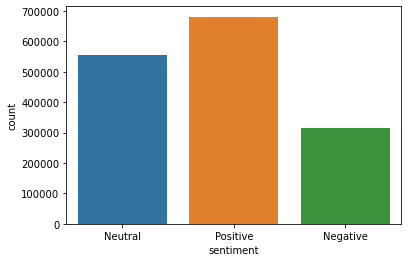

In [16]:
#visualize the sentiment distibution 
import seaborn as sns

sns.countplot(x='sentiment' , data = text_df)